In [ ]:
Tiana   Sec B

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [8]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')




## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [48]:


total = len(df['PassengerId'])

percent_male = df['Sex'].sum() / len(df['PassengerId']) * 100

percent_survived = df['Survived'].sum() / len(df['PassengerId']) * 100

total
percent_male
percent_survived


                                


38.38383838383838

Your written answer:

 - 891
 - 64.75869809203144
 - 38.38383838383838

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [68]:
female_passengers = df[df['Sex'] == 0]
male_passengers = df[df['Sex'] == 1]
percent_female_survived = (female_passengers['Survived'].mean()) * 100
percent_male_survived = (male_passengers['Survived'].mean()) * 100
percent_male_survived

18.890814558058924

Your written answer:
 - 74.20382165605095
 - 18.890814558058924

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [72]:
ticket_class = df.groupby('Pclass').agg(
    total_tickets=('PassengerId', 'count'),                  
    survivorship_percentage=('Survived', 'mean')
)
ticket_class['percentage_of_total_tickets'] = (ticket_class['total_tickets'] / total_passengers) * 100
ticket_class['survivorship_percentage'] *= 100
ticket_class = ticket_class[['percentage_of_total_tickets', 'survivorship_percentage']]
ticket_class

,percentage_of_total_tickets,survivorship_percentage
Pclass,,
1,24.242424,62.962963
2,20.650954,47.282609
3,55.106622,24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.242424
    - % survivorship: 62.962963
- Class 2 
    - % tickets:20.650954 	
    - % survivorship: 47.282609
- Class 3
    - % tickets:55.106622
    - % survivorship: 24.236253


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-survivors:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


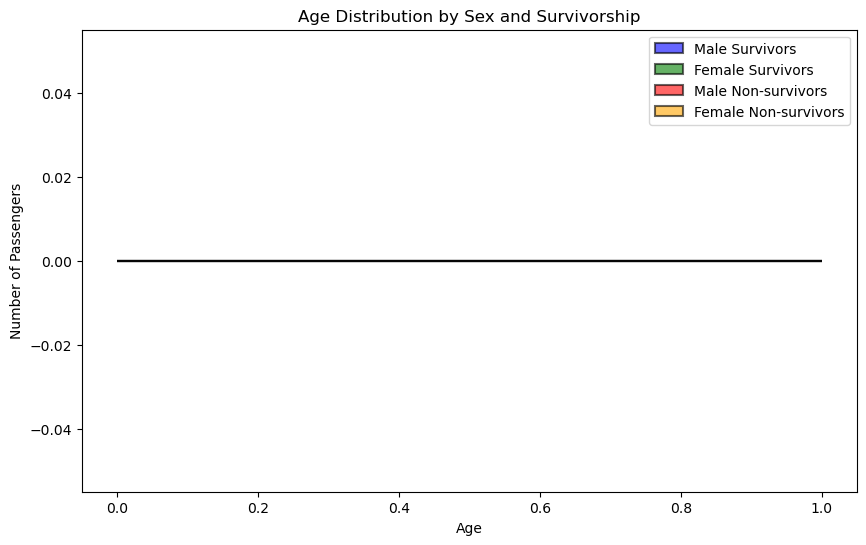

In [79]:
survivors_df = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors_df = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]
print("Survivors:")
print(survivors_df.head())
print("\nNon-survivors:")
print(non_survivors_df.head())
plt.figure(figsize=(10, 6))
kwargs = dict(bins=15, alpha=0.6, histtype='stepfilled', edgecolor='k', linewidth=1.5)
plt.hist(survivors_df[survivors_df['Sex'] == 'male']['Age'].dropna(), color='blue', label='Male Survivors', **kwargs)
plt.hist(survivors_df[survivors_df['Sex'] == 'female']['Age'].dropna(), color='green', label='Female Survivors', **kwargs)
plt.hist(non_survivors_df[non_survivors_df['Sex'] == 'male']['Age'].dropna(), color='red', label='Male Non-survivors', **kwargs)
plt.hist(non_survivors_df[non_survivors_df['Sex'] == 'female']['Age'].dropna(), color='orange', label='Female Non-survivors', **kwargs)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution by Sex and Survivorship")
plt.legend()


plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [91]:
label = ['Survived']
features = ['Sex', 'Age','Pclass', 'Family_Size']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.2)


                                      

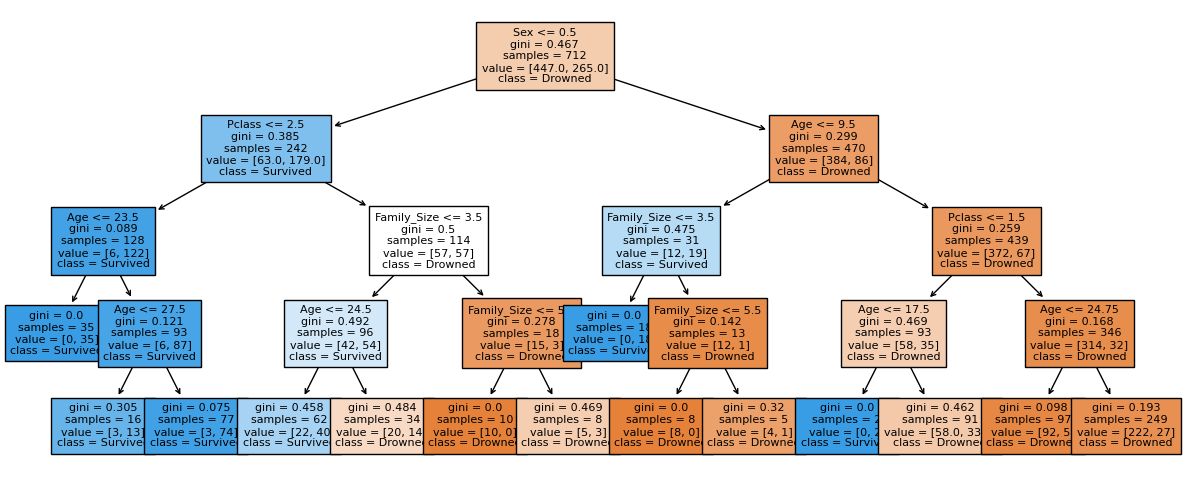

In [99]:
from  sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(1,1, figsize = (15,6))
plot_tree(tree_clf, feature_names = features, class_names = ['Drowned', 'Survived'], filled = True, fontsize = 8)
plt.show()


AttributeError: 'Figure' object has no attribute 'subtitle'

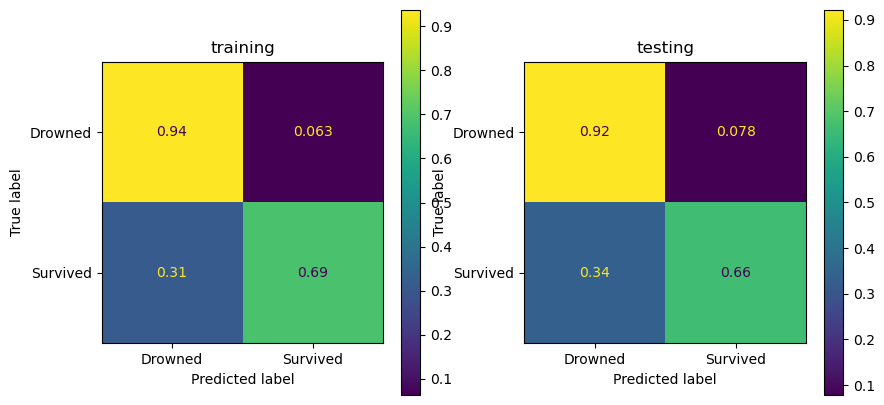

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize = (10,5))

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train,
                                        display_labels = ['Drowned', 'Survived'],
                                        normalize = 'true',
                                        ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test,
                                       display_labels = ['Drowned', 'Survived'],
                                        normalize = 'true',
                                        ax = ax[1])
ax[0].set_title('training')
ax[1].set_title('testing')
fig.subtitle('Decision Tree')
plt.show()

In [113]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(X_train)
xs_train = ss.transform(X_train)
xs_test = ss. transform(X_test)
ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()

knn_clf = KNeighborsClassifier(n_neighbors = 15)
knn_clf.fit(xs_train, ys_train)



KNeighborsClassifier(n_neighbors=15)

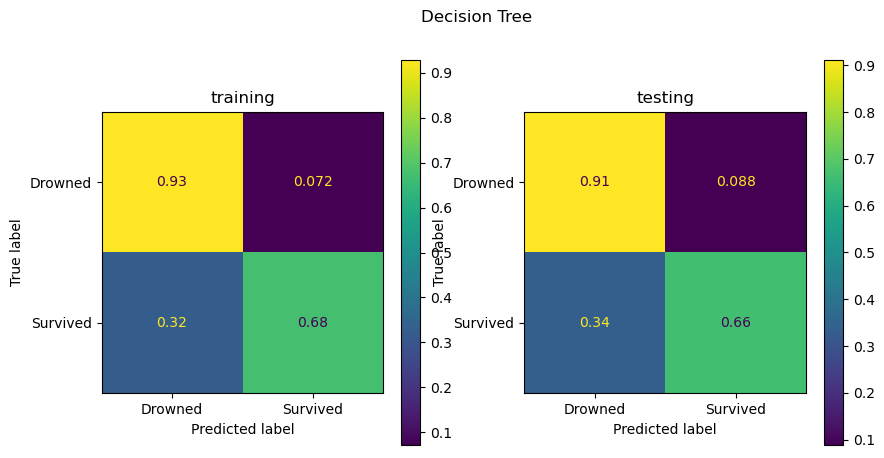

In [125]:
y_knn_train = knn_clf.predict(xs_train)
y_knn_test = knn_clf.predict(xs_test)

fig, ax = plt.subplots(1,2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train,
                                        display_labels = ['Drowned','Survived'],
                                        normalize = 'true',
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test,
                                          display_labels = ['Drowned', 'Survived'],
                                          normalize = 'true',
                                          ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision Tree')
plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - The models perform better on training data since they’ve been optimized to fit it


Which models did you fit and which worked better?
 
 - Confusion matric and decision tree. The decision tree communicates the data better.